In [19]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# fix random seed for reproducibility
numpy.random.seed(7)

In [48]:
# load the dataset
dataframe = pandas.read_csv('C://Users/Vision//Desktop/Final_data_NU.csv', usecols=[1], engine='python')
dataset = dataframe.values
# dataset = dataset.astype('float32')
# # normalize the dataset
# scaler = MinMaxScaler(feature_range=(0, 1))
# dataset = scaler.fit_transform(dataset)
# dataset
dataset

array([[103],
       [103],
       [103],
       [105],
       [108],
       [110],
       [110],
       [112],
       [112],
       [114],
       [114],
       [117],
       [117],
       [118],
       [119],
       [119],
       [120],
       [121],
       [121],
       [122],
       [123],
       [124],
       [124],
       [125],
       [126],
       [127],
       [128],
       [127],
       [128],
       [128],
       [129],
       [129],
       [130],
       [131],
       [132],
       [132],
       [132],
       [133],
       [134],
       [135],
       [135],
       [135],
       [135],
       [136],
       [136],
       [136],
       [137],
       [137],
       [137],
       [137],
       [138],
       [138],
       [138],
       [138],
       [139],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [139],
       [140],
       [141],
       [141],
       [141],
       [141],
       [142],
       [141],
      

In [43]:
 #split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))


161 80


In [44]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [45]:
# reshape into X=t and Y=t+1
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [46]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['acc'])
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
 - 1s - loss: 0.3098 - acc: 0.0063
Epoch 2/10
 - 0s - loss: 0.0297 - acc: 0.0063
Epoch 3/10
 - 0s - loss: 0.0064 - acc: 0.0063
Epoch 4/10
 - 0s - loss: 0.0055 - acc: 0.0063
Epoch 5/10
 - 0s - loss: 0.0046 - acc: 0.0063
Epoch 6/10
 - 0s - loss: 0.0038 - acc: 0.0063
Epoch 7/10
 - 0s - loss: 0.0030 - acc: 0.0063
Epoch 8/10
 - 0s - loss: 0.0023 - acc: 0.0063
Epoch 9/10
 - 0s - loss: 0.0017 - acc: 0.0063
Epoch 10/10
 - 0s - loss: 0.0013 - acc: 0.0063


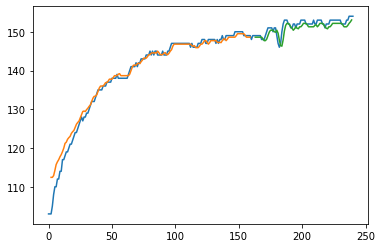

In [47]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()